# **Asteroid Prediction**


# Import Python Libraries

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Reading the Asteroid Dataset

In [56]:
df = pd.read_csv('Asteroid_Updated.csv',  on_bad_lines='skip')

In [57]:
df.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


# Column Renaming

In [58]:
readable_df = df.rename(columns={"a": "semi-major axis",
                                        "e": "eccentricity",
                                        "G": "Magnitude slope parameter",
                                        "i": "Inclination with ecliptic plane",
                                        "om": "Longitude of the ascending node",
                                        "w": "argument of perihelion",
                                        "q": "perihelion distance(au)",
                                        "ad": "aphelion distance(au)",
                                        "per_y": "Orbital period",
                                        "data_arc": "data arc-span(d)",
                                        "condition_code": "Orbit condition code",
                                        "n_obs_used": "number of observations used",
                                        "H": "Absolute Magnitude parameter",
                                        })

Full name column is not useful for the model's prediction ability.

In [59]:
readable_df = readable_df.drop(['name'], axis=1)
readable_df.head()

,semi-major axis,eccentricity,Inclination with ecliptic plane,Longitude of the ascending node,argument of perihelion,perihelion distance(au),aphelion distance(au),Orbital period,data arc-span(d),Orbit condition code,...,UB,IR,spec_B,spec_T,Magnitude slope parameter,moid,class,n,per,ma
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


In [60]:
readable_df.shape

(839714, 30)

# **Exploration (EDA) & Visualization**

## Handling missing values - dropping values

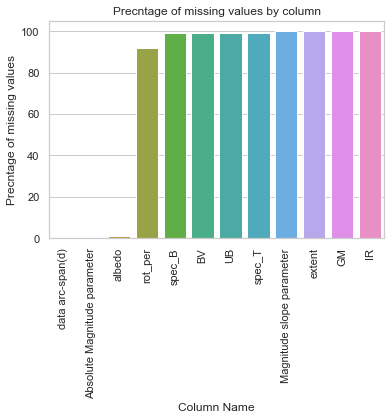

In [134]:
missing_values = readable_df.isnull().sum() / len(readable_df) * 100
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values = missing_values.to_frame()
missing_values.columns = ['Precntage of missing values']
missing_values.index.names = ['Column Name']
missing_values['Column Name'] = missing_values.index
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Column Name', y = 'Precntage of missing values', data=missing_values).set_title('Precntage of missing values by column')
plt.xticks(rotation = 90)
plt.show()

Text(0.5, 1.0, 'Missing values')

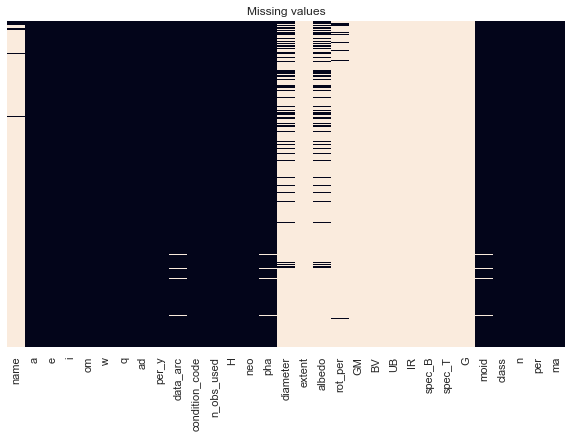

In [135]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
plt.title("Missing values")

In [61]:
readable_df.isna().sum()

semi-major axis                         2
eccentricity                            0
Inclination with ecliptic plane         0
Longitude of the ascending node         0
argument of perihelion                  0
perihelion distance(au)                 0
aphelion distance(au)                   6
Orbital period                          1
data arc-span(d)                    15474
Orbit condition code                  867
number of observations used             0
Absolute Magnitude parameter         2689
neo                                     6
pha                                 16442
diameter                           702078
extent                             839696
albedo                             703305
rot_per                            820918
GM                                 839700
BV                                 838693
UB                                 838735
IR                                 839713
spec_B                             838048
spec_T                            

Now we will drop any row with null value in the diameter field

In [62]:
readable_df = readable_df.dropna(axis=0, subset=['diameter'])
readable_df.shape

(137636, 30)

In [63]:
def print_null_columns_sum(df):
    column_null_list = df.columns[df.isna().sum() > 0].tolist()
    print(df[column_null_list].isna().sum())
    
print_null_columns_sum(readable_df)

data arc-span(d)                   138
Absolute Magnitude parameter       747
extent                          137620
albedo                            1230
rot_per                         126448
GM                              137622
BV                              136631
UB                              136671
IR                              137635
spec_B                          136266
spec_T                          136671
Magnitude slope parameter       137517
dtype: int64


There are still a lot of columns with missing values so we will drop them completely

In [64]:
cleaned_df = readable_df.drop(["Magnitude slope parameter", 'spec_T', 'spec_B', "IR", "UB",
                               "BV", "GM", "rot_per", "extent"], axis=1)
print_null_columns_sum(cleaned_df)

data arc-span(d)                 138
Absolute Magnitude parameter     747
albedo                          1230
dtype: int64


In [65]:
print(f"shape before drop: {cleaned_df.shape}")
cleaned_df = cleaned_df.dropna()
print(f"shape after drop:  {cleaned_df.shape}")

shape before drop: (137636, 21)
shape after drop:  (136005, 21)


In [66]:
print_null_columns_sum(cleaned_df)

Series([], dtype: float64)


In [67]:
cleaned_df.dtypes

semi-major axis                    float64
eccentricity                       float64
Inclination with ecliptic plane    float64
Longitude of the ascending node    float64
argument of perihelion             float64
perihelion distance(au)            float64
aphelion distance(au)              float64
Orbital period                     float64
data arc-span(d)                   float64
Orbit condition code                object
number of observations used          int64
Absolute Magnitude parameter       float64
neo                                 object
pha                                 object
diameter                            object
albedo                             float64
moid                               float64
class                               object
n                                  float64
per                                float64
ma                                 float64
dtype: object

In [68]:
def adjust_numeric_data_types(df):
    return df.astype({'diameter': 'float64', 'Orbit condition code': 'float64'})

We also change some of the data types of other columns.

In [69]:
cleaned_df = adjust_numeric_data_types(cleaned_df)
cleaned_df.dtypes

semi-major axis                    float64
eccentricity                       float64
Inclination with ecliptic plane    float64
Longitude of the ascending node    float64
argument of perihelion             float64
perihelion distance(au)            float64
aphelion distance(au)              float64
Orbital period                     float64
data arc-span(d)                   float64
Orbit condition code               float64
number of observations used          int64
Absolute Magnitude parameter       float64
neo                                 object
pha                                 object
diameter                           float64
albedo                             float64
moid                               float64
class                               object
n                                  float64
per                                float64
ma                                 float64
dtype: object

## Dealing with Categorical variables

### neo and pha columns

In [70]:
def handle_categorical_data(df, categories_list=['neo', 'pha', 'class']):
    categorical_data = df.select_dtypes(include=['object']).copy()
    new_columns = pd.get_dummies(categorical_data, columns=categories_list, drop_first=True)
    df = df.drop(categories_list, axis = 1)
    model_df = pd.concat([df, new_columns], axis=1)
    return model_df

## Correlation Between Features

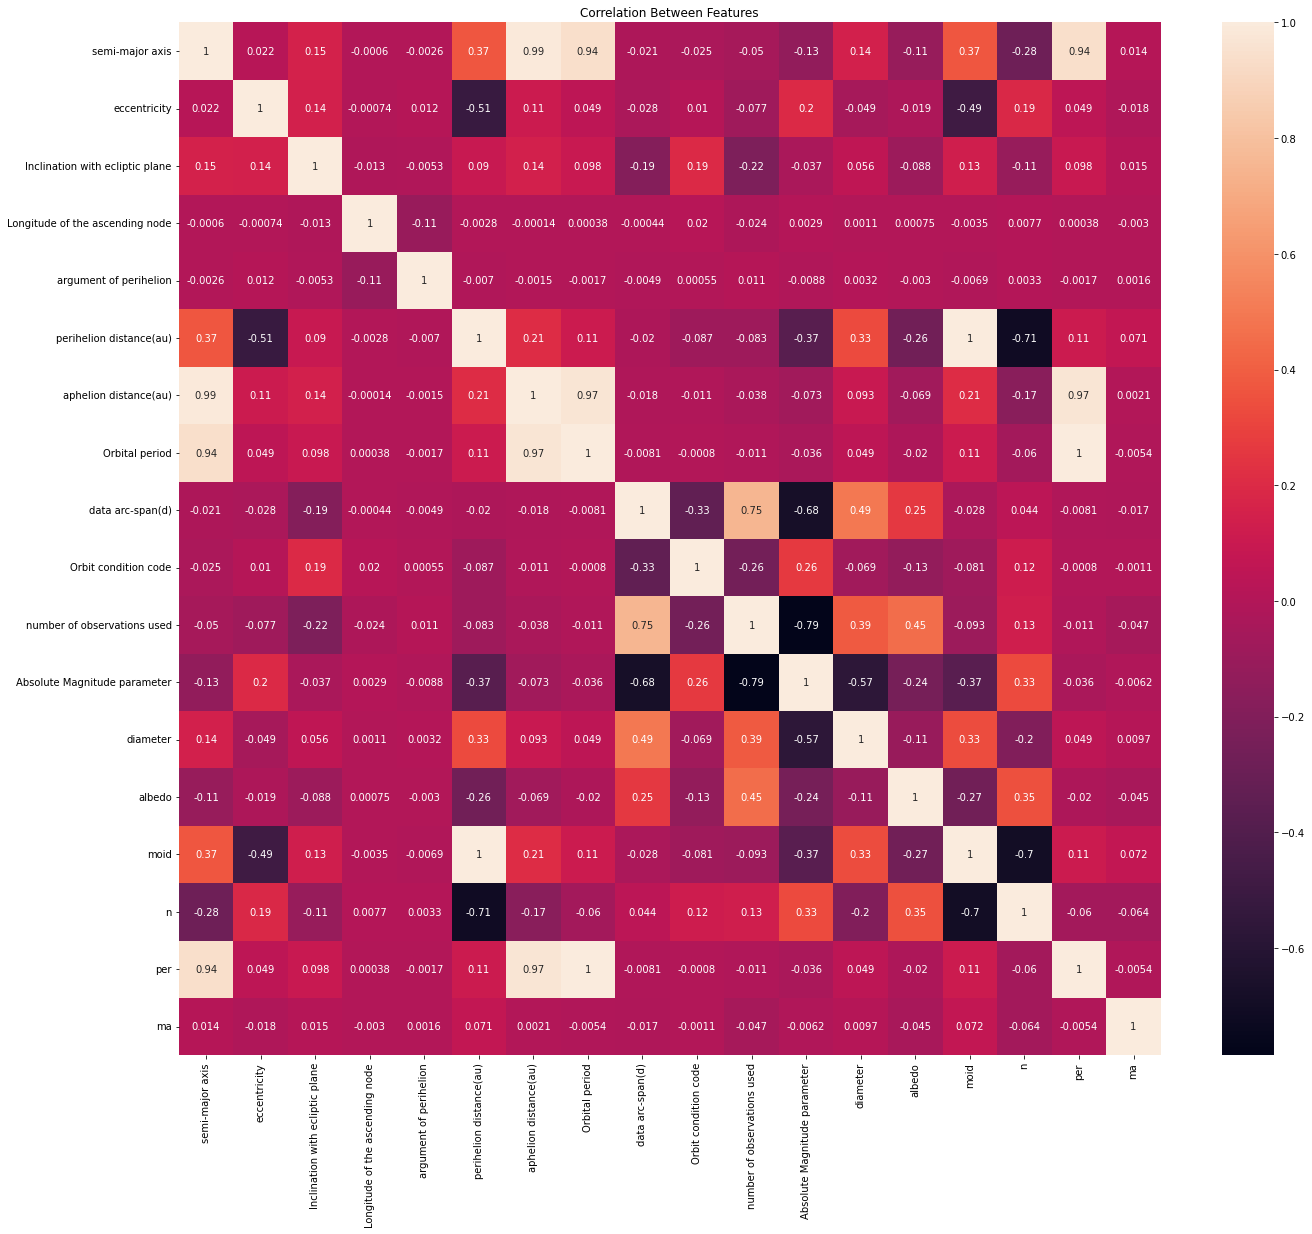

In [74]:
plt.figure(figsize=(22, 19))
sns.heatmap(cleaned_df.corr(method='pearson'),annot=True)
plt.title("Correlation Between Features")
plt.show()

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [76]:
def init_dataset(model_df):
    y = model_df['diameter']
    X = model_df.drop('diameter', axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [77]:
X_train, X_test, y_train, y_test = init_dataset(cleaned_df)
X_train = handle_categorical_data(X_train)
X_test = handle_categorical_data(X_test)

In [78]:
def different_models(Classifiers, X_train, X_test, y_train, y_test):
    for classifier in Classifiers.keys():
        clf = Classifiers[classifier]
        clf.fit(X_train, y_train)
        predict = clf.predict(X_test)
        print(f'{classifier}:\n')
        print('Training Accuracy : ' , clf.score(X_train, y_train))
        print('Test Accuracy : ' , clf.score(X_test, y_test))
        print(f"MSE score is: {mean_squared_error(y_test, predict)}")

## Basic Regression Models

In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [80]:
Classifiers = {"Linear Regression": LinearRegression(),
              "Random Forest": RandomForestRegressor(),
             }
different_models(Classifiers, X_train, X_test, y_train, y_test)

Linear Regression:

Training Accuracy :  0.5454264905959538
Test Accuracy :  0.39247973195408636
MSE score is: 65.480004894875
Random Forest:

Training Accuracy :  0.9941784972242428
Test Accuracy :  0.9269865657022163
MSE score is: 7.869564665864273


### Result conclusion from the models
Basic Linear Regression was able to achieve only 39% accuracy results (with high overfitting). </br>
Basic Random Forest was able to achieve 93% accuracy results (with a little overfitting). </br>

### Dropping columns which has more than 90% of missing values

In [81]:
def print_percent_missing(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value = pd.DataFrame({'column': df.columns,'percent_missing': percent_missing})
    missing_value = missing_value.sort_values('percent_missing', ascending=False)    
    
    column_null_list = missing_value[missing_value["percent_missing"] > 0]
    print(column_null_list["percent_missing"])
    return missing_value

In [82]:
missing_value = print_percent_missing(readable_df)

IR                              99.999273
GM                              99.989828
extent                          99.988375
Magnitude slope parameter       99.913540
spec_T                          99.298875
UB                              99.298875
BV                              99.269813
spec_B                          99.004621
rot_per                         91.871313
albedo                           0.893662
Absolute Magnitude parameter     0.542736
data arc-span(d)                 0.100264
Name: percent_missing, dtype: float64


In [113]:
drop_cols = missing_value["column"][missing_value["percent_missing"] > 90]
cleaned_df = readable_df.drop(columns=drop_cols)

# Split the dataset into training and testing sets

In [114]:
cleaned_df = adjust_numeric_data_types(cleaned_df)
dtf_train, dtf_test = train_test_split(cleaned_df, test_size=0.2)

In [115]:
print_null_columns_sum(dtf_train)

data arc-span(d)                121
Absolute Magnitude parameter    601
albedo                          973
dtype: int64


In [116]:
dtf_train.dtypes

semi-major axis                    float64
eccentricity                       float64
Inclination with ecliptic plane    float64
Longitude of the ascending node    float64
argument of perihelion             float64
perihelion distance(au)            float64
aphelion distance(au)              float64
Orbital period                     float64
data arc-span(d)                   float64
Orbit condition code               float64
number of observations used          int64
Absolute Magnitude parameter       float64
neo                                 object
pha                                 object
diameter                           float64
albedo                             float64
moid                               float64
class                               object
n                                  float64
per                                float64
ma                                 float64
dtype: object

In [117]:
nan_cols_contiguous = ['data arc-span(d)', 'Absolute Magnitude parameter', 'albedo']

# "One Hot" encoding

In [118]:
dtf_train = handle_categorical_data(dtf_train, dtf_train.select_dtypes(include=['object']).columns)
dtf_test = handle_categorical_data(dtf_test, dtf_test.select_dtypes(include=['object']).columns)

# Predict missing values

In [122]:
def predict_missing_values(nan_cols, model_df_train, model_df_test):

  for arg in nan_cols:
    model_copy = model_df_train.copy()
    nan_cols_con_copy = nan_cols.copy()
    nan_cols_con_copy.remove(arg)
    model_copy = model_copy.drop(nan_cols_con_copy, axis=1)
    test_data = model_copy[model_copy[arg].isnull()]
    model_copy.dropna(inplace=True)

    y_train = model_copy[arg]
    X_train = model_copy.drop(arg, axis=1)
    X_test = test_data.drop(arg, axis=1)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_df_train.loc[model_df_train[arg].isnull(), arg] = y_pred
    #model_copy_test = model_df_test.copy()

    test_data = model_df_test[model_df_test[arg].isnull()]
    #y_pred_test = model.predict(model_df_test.drop(arg, axis=1))
    dropped = test_data.drop(nan_cols, axis=1)
    y_pred_test = model.predict(dropped)
    model_df_test.loc[model_df_test[arg].isnull(), arg] = y_pred_test

In [123]:
dtf_train_predict = dtf_train.copy()
dtf_test_predict = dtf_test.copy()


In [124]:
predict_missing_values(nan_cols_contiguous, dtf_train_predict, dtf_test_predict)

In [125]:
print_null_columns_sum(dtf_train_predict)

Series([], dtype: float64)


# Basic Regression Models

In [126]:
y_train = dtf_train_predict['diameter']
X_train = dtf_train_predict.drop(['diameter'], axis = 1)
y_test = dtf_test_predict['diameter']
X_test = dtf_test_predict.drop(['diameter'], axis = 1)

In [127]:
Classifiers = {"Linear Regression": LinearRegression(),
              "Random Forest": RandomForestRegressor(),
             }
different_models(Classifiers, X_train, X_test, y_train, y_test)

Linear Regression:

Training Accuracy :  0.48744900407747677
Test Accuracy :  0.5522111988932135
MSE score is: 43.18536435650723
Random Forest:

Training Accuracy :  0.9931309005717852
Test Accuracy :  0.9678386106573941
MSE score is: 3.1016883708101286


### Result conclusion from the models
Basic Linear Regression was able to achieve only 55% accuracy results (with higher score on test set!). </br>
Basic Random Forest was able to achieve 97% accuracy results (with a little overfitting). </br>

# Fill null values with the mean

In [128]:
def fillnawithMean(nan_cols, dtf_train, dtf_test):
  for arg in nan_cols:
    dtf_train[arg] = dtf_train[arg].fillna(dtf_train[arg].mean())
    dtf_test[arg] = dtf_test[arg].fillna(dtf_train[arg].mean())

In [129]:
dtf_train_mean = dtf_train.copy()
dtf_test_mean = dtf_test.copy()

In [130]:
fillnawithMean(nan_cols_contiguous,dtf_train_mean, dtf_test_mean)

In [131]:
print_null_columns_sum(dtf_train_mean)

Series([], dtype: float64)


# Basic Regression Models

In [132]:
y_train = dtf_train_mean['diameter']
X_train = dtf_train_mean.drop(['diameter'], axis = 1)
y_test = dtf_test_mean['diameter']
X_test = dtf_test_mean.drop(['diameter'], axis = 1)

In [133]:
Classifiers = {"Linear Regression": LinearRegression(),
              "Random Forest": RandomForestRegressor(),
             }
different_models(Classifiers, X_train, X_test, y_train, y_test)

Linear Regression:

Training Accuracy :  0.4844517867507821
Test Accuracy :  0.5512661235788565
MSE score is: 43.27650871227042
Random Forest:

Training Accuracy :  0.9922015637886795
Test Accuracy :  0.9586536175980335
MSE score is: 3.987501662478127


### Result conclusion from the models
Basic Linear Regression was able to achieve only 44% accuracy results (with high overfitting). </br>
Basic Random Forest was able to achieve 97% accuracy results (with a little overfitting). </br>

<h3>Ways to improve:</h3>
<ul>
    <li>Data cleaning and manipulation</li>
    <li>Feature selection</li>
    <li>Hyperparameter tuning</li>
    <li>Boosting methods such as XGBoost</li>
</ul>